In [15]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importing park data from csv

park_data = pd.read_csv('../datasets/Annual Summary Report-All Data.csv', skiprows=2, skip_footer=115)

In [27]:
# Lets see what we have
park_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20883 entries, 0 to 20882
Data columns (total 24 columns):
ParkName                            20883 non-null object
Year                                20883 non-null int64
RecreationVisitors                  20883 non-null object
NonRecreationVisitors               12657 non-null object
RecreationHours                     12657 non-null object
NonRecreationHours                  12657 non-null object
ConcessionerLodging                 12657 non-null object
ConcessionerCamping                 12657 non-null object
TentCampers                         12657 non-null object
RVCampers                           12657 non-null object
Backcountry                         12657 non-null object
NonRecreationOvernightStays         12657 non-null object
MiscellaneousOvernightStays         12657 non-null object
TotalRecreationVisitors             20883 non-null object
TotalNonRecreationVisitors          20883 non-null object
TotalRecreationHours  

In [28]:
# It seems like we are missing a lot of values, and the datatype is object rather than int.
park_data.head()

,ParkName,Year,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,...,TotalNonRecreationVisitors,TotalRecreationHours,TotalNonRecreationHours,TotalConcessionerLodging,TotalConcessionerCamping,TotalTentCampers,TotalRVCampers,TotalBackcountry,TotalNonRecreationOvernightStays,TotalMiscellaneousOvernightStays
0,Abraham Lincoln Birthplace NHP,1934,"175,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,765,454,121","48,125,381,812","2,483,063,225","135,027,904","37,828,463","136,039,174","115,428,819","74,556,117","13,703,609","91,703,783"
1,Abraham Lincoln Birthplace NHP,1935,"89,355",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,765,454,121","48,125,381,812","2,483,063,225","135,027,904","37,828,463","136,039,174","115,428,819","74,556,117","13,703,609","91,703,783"
2,Abraham Lincoln Birthplace NHP,1936,"149,665",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,765,454,121","48,125,381,812","2,483,063,225","135,027,904","37,828,463","136,039,174","115,428,819","74,556,117","13,703,609","91,703,783"
3,Abraham Lincoln Birthplace NHP,1937,"111,840",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,765,454,121","48,125,381,812","2,483,063,225","135,027,904","37,828,463","136,039,174","115,428,819","74,556,117","13,703,609","91,703,783"
4,Abraham Lincoln Birthplace NHP,1938,"121,144",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,765,454,121","48,125,381,812","2,483,063,225","135,027,904","37,828,463","136,039,174","115,428,819","74,556,117","13,703,609","91,703,783"


In [29]:
# First lets set a multi index as 'Park Name' and 'Year'
park_data = park_data.set_index(['ParkName', 'Year'])

In [40]:
# Second, lets fill NaN values with 0
park_data = park_data.fillna(0)

In [43]:
# Lets converrt all dtypes to intergers by removing the comma and forcing to int
park_data = park_data.applymap(lambda x: int(x.replace(',','')) if type(x) == str else int(x))

In [45]:
# Lets check again
park_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20883 entries, (Abraham Lincoln Birthplace NHP, 1934) to (Zion NP, 2016)
Data columns (total 22 columns):
RecreationVisitors                  20883 non-null int64
NonRecreationVisitors               20883 non-null int64
RecreationHours                     20883 non-null int64
NonRecreationHours                  20883 non-null int64
ConcessionerLodging                 20883 non-null int64
ConcessionerCamping                 20883 non-null int64
TentCampers                         20883 non-null int64
RVCampers                           20883 non-null int64
Backcountry                         20883 non-null int64
NonRecreationOvernightStays         20883 non-null int64
MiscellaneousOvernightStays         20883 non-null int64
TotalRecreationVisitors             20883 non-null int64
TotalNonRecreationVisitors          20883 non-null int64
TotalRecreationHours                20883 non-null int64
TotalNonRecreationHours             20883 non-

In [57]:
# Perfect. Now we want to get rid of the Totalx columns as they are not park specific
# List of columns that do not start with 'Total'
cols = [col for col in park_data.columns if col.find('Total') < 0 ]

park_data = park_data[cols]

In [58]:
# Lets see what we have now
park_data.head()

RecreationVisitors  \
ParkName                       Year                       
Abraham Lincoln Birthplace NHP 1934              175000   
                               1935               89355   
                               1936              149665   
                               1937              111840   
                               1938              121144   

                                     NonRecreationVisitors  RecreationHours  \
ParkName                       Year                                           
Abraham Lincoln Birthplace NHP 1934                      0                0   
                               1935                      0                0   
                               1936                      0                0   
                               1937                      0                0   
                               1938                      0                0   

                                     NonRecreationHours  ConcessionerLodging  \
ParkName                       Year                                            
Abraham Lincoln Birthplace NHP 1934                   0                    0   
                               1935                   0                    0   
                               1936                   0                    0   
                               1937                   0                    0   
                               1938                   0                    0   

                                     ConcessionerCamping  TentCampers  \
ParkName                       Year                                     
Abraham Lincoln Birthplace NHP 1934                    0            0   
                               1935                    0            0   
                               1936                    0            0   
                               1937                    0            0   
                               1938                    0            0   

                                     RVCampers  Backcountry  \
ParkName                       Year                           
Abraham Lincoln Birthplace NHP 1934          0            0   
                               1935          0            0   
                               1936          0            0   
                               1937          0            0   
                               1938          0            0   

                                     NonRecreationOvernightStays  \
ParkName                       Year                                
Abraham Lincoln Birthplace NHP 1934                            0   
                               1935                            0   
                               1936                            0   
                               1937                            0   
                               1938                            0   

                                     MiscellaneousOvernightStays  
ParkName                       Year                               
Abraham Lincoln Birthplace NHP 1934                            0  
                               1935                            0  
                               1936                            0  
                               1937                            0  
                               1938                            0

In [60]:
# Lets look at tent campers in Yosemite since 1980

In [61]:
# tent campers in yosemite
# Casting TentCampers to int

yosemite_campers = park_data.loc['Yosemite NP'][['TentCampers']][park_data.loc['Yosemite NP']['TentCampers'] > 300000]
yosemite_campers.TentCampers = yosemite_campers.TentCampers.astype(int)

In [62]:
# Creating others for future use
yellowstone_campers = park_data.loc['Yellowstone NP'][['TentCampers']][park_data.loc['Yellowstone NP']['TentCampers'] > 100000]
yellowstone_campers.TentCampers = yellowstone_campers.TentCampers.astype(int)

acadia_campers = park_data.loc['Acadia NP'][['TentCampers']][park_data.loc['Acadia NP']['TentCampers'] > 100000]
acadia_campers.TentCampers = acadia_campers.TentCampers.astype(int)

In [63]:
yosemite_campers.head()

,TentCampers
Year,
1980,625208
1981,737591
1982,665191
1983,571137
1984,747145


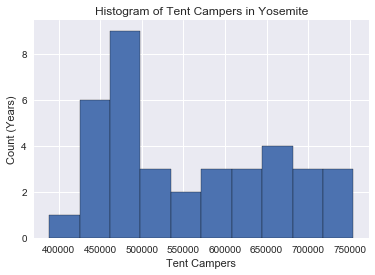

In [64]:
# Use _ as temp variable
_ = plt.hist(yosemite_campers.TentCampers, edgecolor='black')

# Label Axis
plt.xlabel('Tent Campers')
plt.ylabel('Count (Years)')
plt.title('Histogram of Tent Campers in Yosemite')
plt.show()

In [65]:
# Use square root of datapoints as bin #s
n_len = len(yosemite_campers.TentCampers)
n_bins = np.sqrt(n_len)
n_bins = int(n_bins)

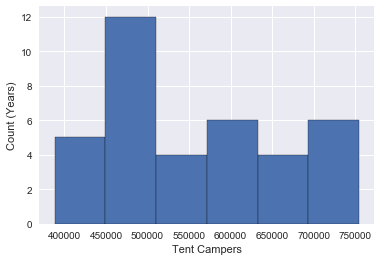

In [66]:
_ = plt.hist(yosemite_campers.TentCampers, bins=n_bins, edgecolor='black')
_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Count (Years)')
plt.show()

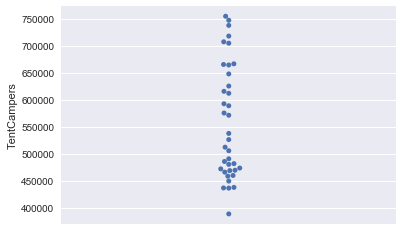

In [67]:
# Swarm plots to remove bin bias
plt.clf()

sns.swarmplot(y='TentCampers', data=yosemite_campers.reset_index())
plt.show()

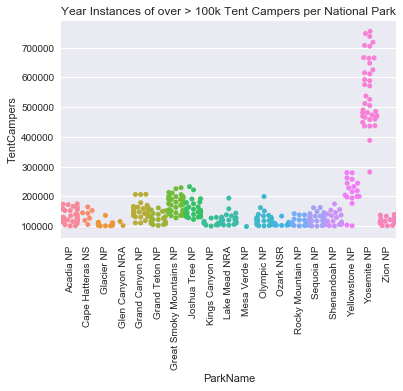

In [68]:
# Show boxplots as well

# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.TentCampers > 100000)]

_.TentCampers = _.TentCampers.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='TentCampers', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.title('Year Instances of over > 100k Tent Campers per National Park')
plt.show()

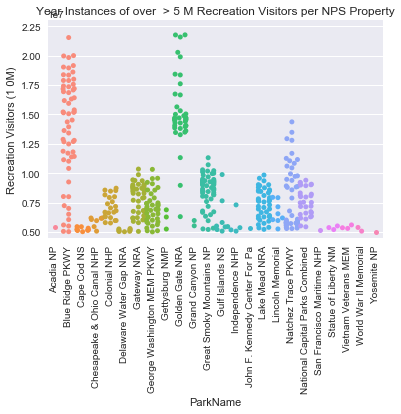

In [69]:
# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.RecreationVisitors > 5000000)]

_.RecreationVisitors = _.RecreationVisitors.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='RecreationVisitors', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.ylabel('Recreation Visitors (1 0M)')
plt.ylim(4500000,23000000)
plt.title('Year Instances of over  > 5 M Recreation Visitors per NPS Property')
plt.show()

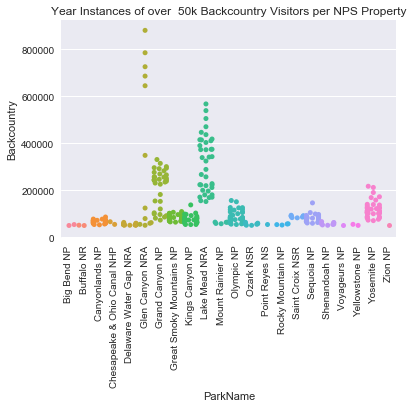

In [70]:
# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.Backcountry > 50000)]

_.Backcountry = _.Backcountry.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='Backcountry', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.title('Year Instances of over  50k Backcountry Visitors per NPS Property')
plt.show()

In [75]:
# ECDF
# Empricial Cumulative Distribution Function
# Shows how equally distributed (approx of normality) data is

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    
    # X val is sorted values
    x = np.sort(data)
    
    # y val: np.arange creates evenly spaced array
    y = np.arange(1, 1+n) / n
    
    return x,y

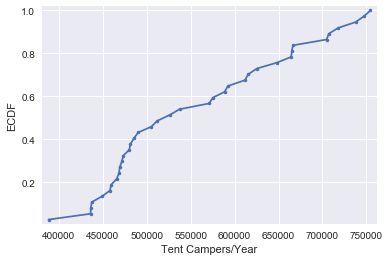

In [76]:
# Plotting the ECDF

x_vers, y_vers = ecdf(yosemite_campers.TentCampers)

plt.plot(x_vers, y_vers, marker = '.')
plt.margins(0.02) # creates a buffer margin
plt.ylabel('ECDF')
plt.xlabel('Tent Campers/Year')
plt.show()

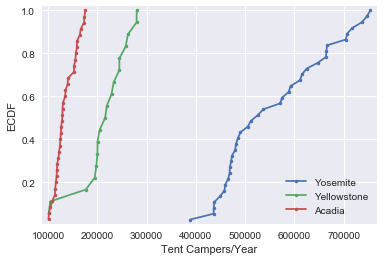

In [79]:
# Plotting multiple ECDFs

x_yotent, y_yotent = ecdf(yosemite_campers.TentCampers)
x_yetent, y_yetent = ecdf(yellowstone_campers.TentCampers)
x_actent, y_actent = ecdf(acadia_campers.TentCampers)


plt.plot(x_yotent, y_yotent, marker = '.')
plt.plot(x_yetent, y_yetent, marker = '.')
plt.plot(x_actent, y_actent, marker = '.')

plt.margins(0.02) # creates a buffer margin
plt.ylabel('ECDF')
plt.xlabel('Tent Campers/Year')
plt.legend(['Yosemite', 'Yellowstone', 'Acadia'])
plt.show()

In [81]:
# Grab means and medians for Yosemite
print('mean:', np.mean(yosemite_campers.TentCampers))
print('median:',np.median(yosemite_campers.TentCampers))

mean: 557424.972972973
median: 526026.0


In [82]:
# Percentiles
np.percentile(yosemite_campers.TentCampers, [25,50,75])

array([469256., 526026., 647698.])

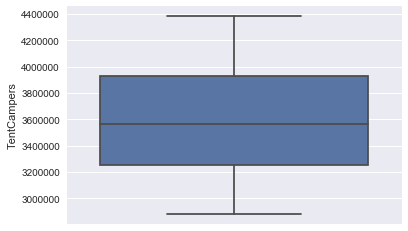

In [83]:
# Boxplots
sns.boxplot(y='TentCampers',data=park_data[park_data.TentCampers>10].groupby('Year').sum().reset_index())
plt.show()

In [84]:
# Advanced ECDF graphing
# putting different markers in for percentiles

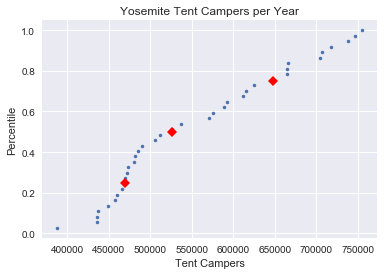

In [85]:
# ECDF of yosemite tent campers

_ = plt.plot(x_yotent, y_yotent,".")
_ = plt.title('Yosemite Tent Campers per Year')
_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Percentile')

# Creating Red Triangles for percentiles
# creating a list of the percentiles (25,50,75)

percentiles = [25,50,75]

# Finding the x_coord for each percentile using np.percentile
x_percentile = np.percentile(yosemite_campers, percentiles)

# need to divide/100 on the percentile to keep the scale proper
plt.plot(x_percentile, [percent/100 for percent in percentiles], "D", color='red') 

plt.show()

In [86]:
# Writing a function to create ECDFs 

def ecdf_graph(park,minimum = 1000,column = 'TentCampers', ecdf_marker = '.',
               ecdf_color = 'blue',percentiles = [25,50,75],perc_marker = 'D', perc_color = 'red', normal=False):
    '''take data from parks_data and return an ECDF of distribution'''
    # Creating series based of park and column
    df = park_data.loc[park]
    df = df[df[column] > minimum]
    df = df[column]
    
    # Create x_vers, y_vers from df
    x_vars, y_vars = ecdf(df)
    _ = plt.plot(x_vars, y_vars,ecdf_marker, color = ecdf_color)
    
    # Add a normal curve cdf
    if normal == True:
        x_normal, y_normal = ecdf(np.random.normal(loc=df.mean(), scale=df.std(), size=10000))
        _ = plt.plot(x_normal, y_normal, color = 'orange', alpha=0.5)
        _ = plt.legend(['Data','Normal Distribution'])

    # Percentiles
    
    # Defining percentiles to be marked
    x_percentile = np.percentile(df,percentiles)
    y_percentile = [percent/100 for percent in percentiles]
    
    # Plotting the percentiles
    plt.plot(x_percentile, y_percentile,perc_marker, color = perc_color)
    for i in range(len(percentiles)):
        x_coord = x_percentile[i]
        y_coord = y_percentile[i]
        text = percentiles[i]
        plt.annotate(s="{}th Percentile".format(text), xy = (x_coord,y_coord), xytext = (x_coord + x_coord*0.005, y_coord - 0.05))
    
    # Adding the labels and legend
    _ = plt.xlabel(column)
    _ = plt.ylabel('Percentile')
    _ = plt.title("ECDF of Yearly {0} {1} (minimum {2} {1})".format(park,column, minimum))

    # Showing the plot
    plt.show()

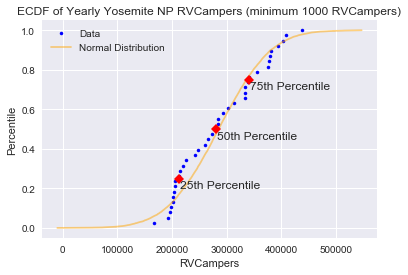

In [87]:
# Example
ecdf_graph('Yosemite NP', column='RVCampers', normal=True, minimum=1000 )

In [88]:
park_data.columns

Index(['RecreationVisitors', 'NonRecreationVisitors', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays'],
      dtype='object')

# Boxplots and such

In [89]:
#creating semi useless dataframe w/ tent camping info from Yosemite, Acadia, Yellowstone

triple_camping_data = pd.concat([yosemite_campers.TentCampers,yellowstone_campers.TentCampers, acadia_campers.TentCampers], axis=1)
# Renaming TentCampers column to actual parks
triple_camping_data.columns = ['Yosemite NP', 'Acadia NP', 'Yellowstone NP']

# We need to format the data so that the park is a column, here we melt them
triple_camping_data = triple_camping_data.melt()
# Rename column labels
triple_camping_data.columns = ['Park', 'TentCampers']
# Drop NA data
triple_camping_data = triple_camping_data.dropna()

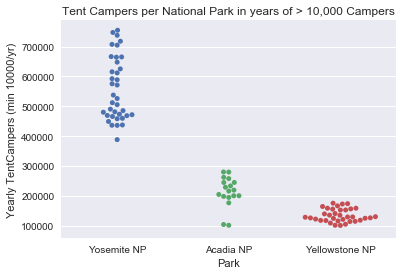

In [90]:
# First we will see how this looks in a swarm plot

sns.swarmplot(x='Park', y='TentCampers', data = triple_camping_data)

# Of Course we need labels
_ = plt.xlabel('Park')
_ = plt.ylabel('Yearly TentCampers (min 10000/yr)') 
_ = plt.title('Tent Campers per National Park in years of > 10,000 Campers')

# Note there is a lot of excluded data which would change the plot pretty dramatically 

# Show it
plt.show()

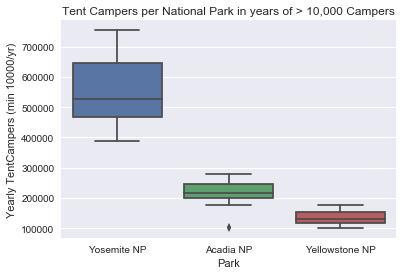

In [92]:
# Now on to the boxplot

_ = sns.boxplot(x='Park', y='TentCampers', data=triple_camping_data)

# Of Course we need labels
_ = plt.xlabel('Park')
_ = plt.ylabel('Yearly TentCampers (min 10000/yr)') 
_ = plt.title('Tent Campers per National Park in years of > 10,000 Campers')

# Note there is a lot of excluded data which would change the plot pretty dramatically 

# Show it. Note the single outlier in the Acadia boxplot. Potential future avenue of analysis
plt.show()

# Variance and Std Deviation

In [93]:
# Variance
print(np.var(yosemite_campers))

# Standard deviation
print(np.std(yosemite_campers))

TentCampers    1.090151e+10
dtype: float64
TentCampers    104410.297907
dtype: float64


# Covariance and Pearson Coefficient

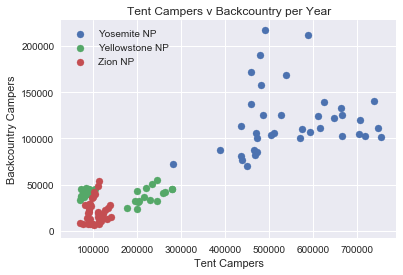

In [94]:
# Lets review the data w/ scatterplots
# We can also look at how Backcountry and TentCamping are related
# Since Acadia did not have backcountry camping until recently, we will use Zion NP instead

yosemite_tent_back = park_data.loc['Yosemite NP'][['TentCampers', 'Backcountry']][park_data.loc['Yosemite NP']['TentCampers'] > 1000]
yellowstone_tent_back = park_data.loc['Yellowstone NP'][['TentCampers', 'Backcountry']][park_data.loc['Yellowstone NP']['TentCampers'] > 1000]
zion_tent_back = park_data.loc['Zion NP'][['TentCampers', 'Backcountry']][park_data.loc['Zion NP']['TentCampers'] > 1000]


_ = plt.scatter(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)
_ = plt.scatter(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)
_ = plt.scatter(zion_tent_back.TentCampers, zion_tent_back.Backcountry)
_ = plt.legend(['Yosemite NP', 'Yellowstone NP', 'Zion NP'])

_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Backcountry Campers')
_ = plt.title('Tent Campers v Backcountry per Year')
plt.show()



# Covariance: 

### Mean of the product of the differences (((x1 - xmean) * (y1 - ymean))/2)   [assuming 2 dimensions and 1 points]

# Pearson Correlation  Coefficient (ρ): 
## covariance/((std of x) * (std of y))
### variability due to codependance / independant variability 

#### 0 = No correlation, 1 = highly correlated

In [95]:
# Covariance, np.cov()
# Matrix that is spit out shows [[cov(x), cov(x,y)], [cov(y,x), cov(y)] where cov(x,y) == cov(y,x)
np.cov(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)

array([[1.28967105e+10, 5.84281796e+08],
       [5.84281796e+08, 1.25627696e+09]])

In [96]:
# Defining Pearson Coeff function
def pearson(x,y):
    #use np.corrcoef as it calculates 
    cor_matrix = np.corrcoef(x,y)
    return round(float(cor_matrix[1,0]),3)

In [98]:
# Calculate Pearson coefficients for each Park
yosemite_tb_pearson = round(float(pearson(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)),3)
yellowstone_tb_pearson = round(float(pearson(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)),3)
zion_tb_pearson = round(float(pearson(zion_tent_back.TentCampers, zion_tent_back.Backcountry)),3)

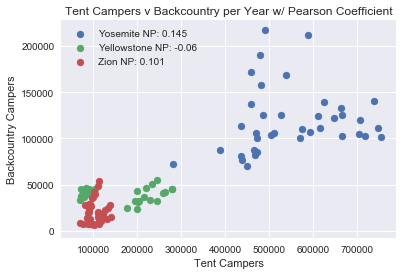

In [100]:
# Redo the graph w/ Pearson coefficients added:

_ = plt.scatter(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)
_ = plt.scatter(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)
_ = plt.scatter(zion_tent_back.TentCampers, zion_tent_back.Backcountry)
_ = plt.legend(['Yosemite NP: {}'.format(yosemite_tb_pearson) , 'Yellowstone NP: {}'.format(yellowstone_tb_pearson),'Zion NP: {}'.format(zion_tb_pearson)])

_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Backcountry Campers')
_ = plt.title('Tent Campers v Backcountry per Year w/ Pearson Coefficient')
plt.show()

# There does not seem to be a measurable coefficient

In [106]:
# Create df based off summed yearly statistics for all Parks
park_data_year_sums = park_data.reset_index().groupby('Year').sum()

park_data_year_sums.tail()

,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays
Year,,,,,,,,,,,
2012,282765682,149441180,1228318424,77197884,3297080,1255590,3203413,2121646,1816904,225239,2379712
2013,273630895,156779302,1177422088,81872947,3095769,1221314,2993845,1976551,1722663,166842,2205845
2014,292800082,168795640,1253175916,90708765,3395578,1263610,3246320,2053965,1888095,117223,2158475
2015,307247252,173060681,1334248906,91746409,3385750,1421213,3680809,2260198,2020068,112259,2151446
2016,330971689,172285627,1427664670,92895795,3272026,1294573,3858162,2543221,2154698,150982,2156818


In [107]:
# Looking at pearson coefficients between variables
def pearson_matrix(var1,var2,data=park_data_year_sums, plot=False, threshold=1000):
    '''Create a pearson_matrix based off two categories'''
    # Establish the df
    df = data[(data[var1] > threshold) & (data[var2] > threshold)]

    # Pearson score
    graph_p = pearson(df[var1],df[var2])
    
    # Plotting the graph
    if plot == True:
        
        _ = plt.scatter(df[var1], df[var2])#, c=df['Decade'])
        _ = plt.xlabel(var1)
        _ = plt.ylabel(var2)
        _ = plt.legend(["Pearson coeff: {}".format(graph_p)])
        _ = plt.title('Total NPS Property {0} v {1} & Pearson Coeff'.format(var1,var2))
        
        plt.show()
    
    return graph_p

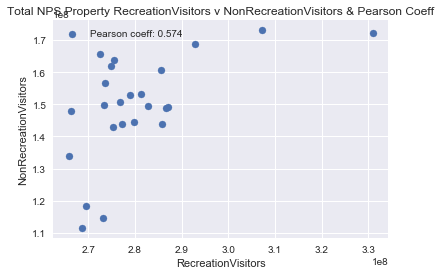

0.574

In [108]:
pearson_matrix('RecreationVisitors', 'NonRecreationVisitors', threshold=100000000, plot=True)

In [109]:
# Establishing Pearson Coefficients between all columns using Pandas .corr()
# Cutting data only from 1979 onwards as most of the data is incomplete beforehand
park_data_year_sums.loc[1979:].corr()


,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays
RecreationVisitors,1.000000,0.640322,0.638025,0.644568,0.153589,0.613289,-0.206640,-0.644587,-0.423456,-0.632938,0.469009
NonRecreationVisitors,0.640322,1.000000,-0.114372,0.989012,-0.321036,0.904949,-0.697125,-0.944937,-0.243655,-0.591617,-0.042524
RecreationHours,0.638025,-0.114372,1.000000,-0.104735,0.657612,-0.124741,0.512919,0.082579,-0.124161,-0.122219,0.699846
NonRecreationHours,0.644568,0.989012,-0.104735,1.000000,-0.262193,0.898613,-0.674991,-0.951605,-0.251171,-0.545879,0.029440
ConcessionerLodging,0.153589,-0.321036,0.657612,-0.262193,1.000000,-0.363518,0.531848,0.184752,-0.061291,0.333836,0.814105
ConcessionerCamping,0.613289,0.904949,-0.124741,0.898613,-0.363518,1.000000,-0.703736,-0.891024,-0.383993,-0.686929,-0.049153
TentCampers,-0.206640,-0.697125,0.512919,-0.674991,0.531848,-0.703736,1.000000,0.756623,0.496440,0.550761,0.267632
RVCampers,-0.644587,-0.944937,0.082579,-0.951605,0.184752,-0.891024,0.756623,1.000000,0.436168,0.633787,-0.140818
Backcountry,-0.423456,-0.243655,-0.124161,-0.251171,-0.061291,-0.383993,0.496440,0.436168,1.000000,0.553425,-0.315709
NonRecreationOvernightStays,-0.632938,-0.591617,-0.122219,-0.545879,0.333836,-0.686929,0.550761,0.633787,0.553425,1.000000,0.010319


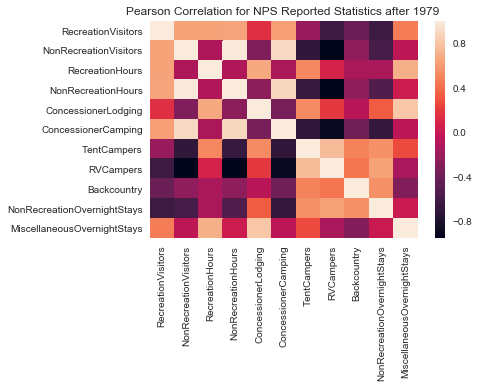

In [110]:
# Plotting the Heatmap using sns.heatmap

sns.heatmap(park_data_year_sums.loc[1979:].corr())
plt.title('Pearson Correlation for NPS Reported Statistics after 1979 ')
plt.show()

In [111]:
# Making a list of Pearson Coeff where abs(value) is greater than 0.65

#Making a temp dataframe where correlation > 0.8 and less than 1.0 to avoid comparing to self
_ = ((abs(park_data_year_sums.loc[1979:].corr()) > 0.8) & (abs(park_data_year_sums.loc[1979:].corr()) < 1.0))

#Making the list
corr_list = []

# iterating through columns
for i in _.columns:
    # iterating through index
    for x in _[i].index:
        if _[i].loc[x] == True:
            # Avoiding duplicates of a,b and b,a
            if (x,i) in corr_list:
                pass
            else:
                corr_list.append((i,x))

In [112]:
# Showing the list of correlated values

corr_list

[('NonRecreationVisitors', 'NonRecreationHours'),
 ('NonRecreationVisitors', 'ConcessionerCamping'),
 ('NonRecreationVisitors', 'RVCampers'),
 ('NonRecreationHours', 'ConcessionerCamping'),
 ('NonRecreationHours', 'RVCampers'),
 ('ConcessionerLodging', 'MiscellaneousOvernightStays'),
 ('ConcessionerCamping', 'RVCampers')]

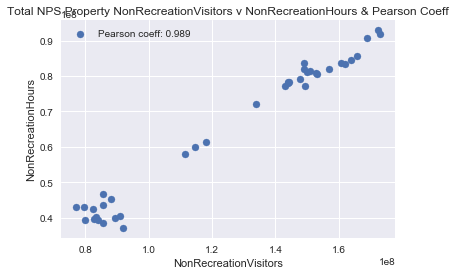

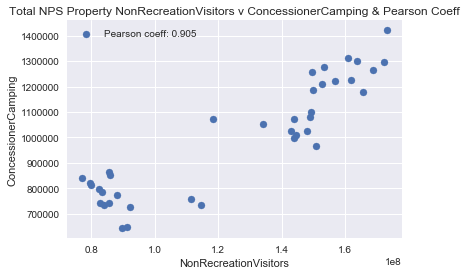

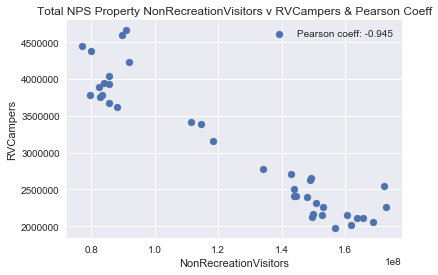

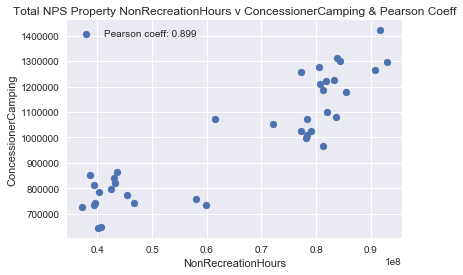

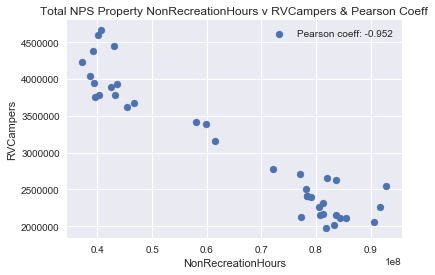

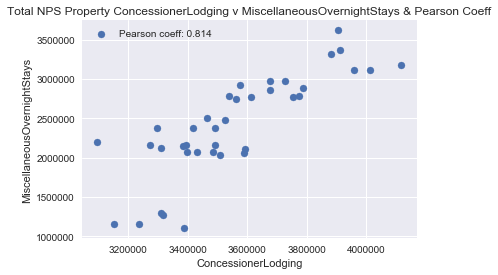

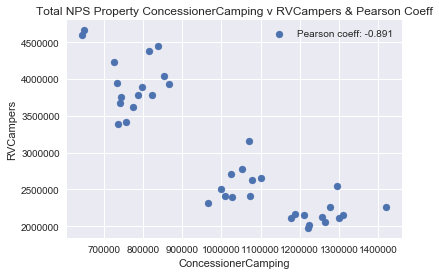

In [113]:
# Graphing using the function
for entry in corr_list:
    pearson_matrix(entry[0], entry[1], plot=True)

In [114]:
# Creating the df for summed data after 1979
park_data_year_sums_79 = park_data_year_sums.loc[1979:]

In [115]:
def decade(year):
    '''Returns decade from year'''
    if year < 1990:
        return 0
    elif year < 2000:
        return 1
    elif year < 2010:
        return 2
    elif year < 2020:
        return 3

In [116]:
park_data_year_sums_79['Decade'] = 0
park_data_year_sums_79['Decade'] = park_data_year_sums_79.reset_index()['Year'].apply(decade)

In [161]:
park_data_year_sums_79.head()

,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays,Decade
Year,,,,,,,,,,,,
1979,205369795,77065306,1027515046,43110345,3151721,838932,3424681,4446370,2397098,564969,1155140,0
1980,220463211,79860871,1094294242,39292243,3235039,814734,3934114,4378491,2395236,575499,1162303,0
1981,238592669,91070631,1203108427,40668286,3386345,650088,4221920,4663020,2329845,628185,1108470,0
1982,244924579,89523436,1229715915,40035428,3312100,644543,4153999,4596036,2424227,450272,1291622,0
1983,243619396,92026935,1240144791,37196465,3317010,725979,3601198,4232793,2579716,367532,1278885,0


In [118]:
Decade = park_data_year_sums_79.reset_index()['Year'].apply(decade)
Decade = [int(num) for num in Decade]
park_data_year_sums_79['Decade'] = Decade

In [158]:
# Looking at pearson coefficients between variables

def pearson_matrix_test(var1,var2,data=park_data_year_sums_79, plot=True, threshold=1000):
    '''Create a pearson_matrix based off two categories'''
    # Establish the df
    df = data

    # Pearson score
    graph_p = pearson(df[var1],df[var2])
    
    # Plotting the graph
    if plot == True:
        _ = plt.scatter(df[var1], df[var2],c=df['Decade'])
        _ = plt.xlabel(var1)
        _ = plt.ylabel(var2)
        _ = plt.legend([graph_p])
        _ = plt.title('Total NPS Property {0} v {1} & Pearson Coeff'.format(var1,var2))
        
        plt.show()
    
    return graph_p

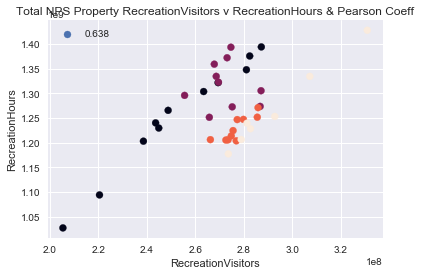

0.638

In [159]:
plt.clf()
pearson_matrix_test('RecreationVisitors', 'RecreationHours')

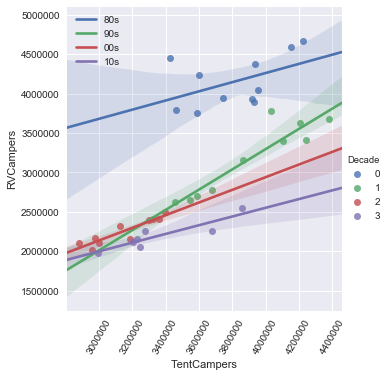

In [147]:
plt.clf()

# Looking at the lmplot by Decade
sns.lmplot(x = 'TentCampers', y= 'RVCampers', data=park_data_year_sums_79, hue='Decade')
plt.xticks(rotation='60')
plt.legend(['80s','90s','00s', '10s'])
plt.show()


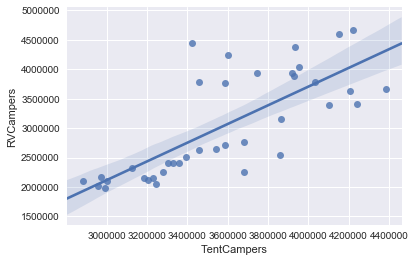

In [160]:
sns.regplot(x='TentCampers', y='RVCampers', data=park_data_year_sums_79)
plt.show()

# Future Directions

* Which parks see yty increase
* Which parks follow national trends
* Further explore correlations and shape of data


# Datasets to add

* Average temperature
* Gas Prices
* National Parks Campaigns
* Population density/distance to park
* Twitter mentions vs VisitCount

# Sandbox/half finished thoughts

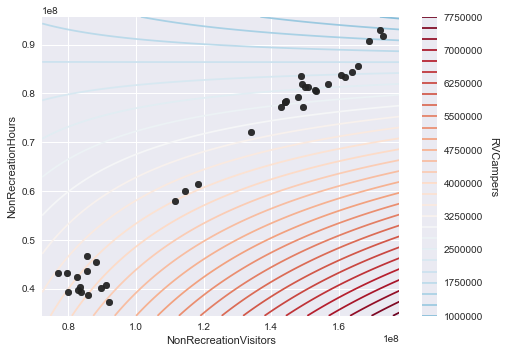

In [57]:
plt.clf()
sns.interactplot(x1='NonRecreationVisitors', x2='NonRecreationHours', y='RVCampers',data=park_data_year_sums_79)
plt.show()

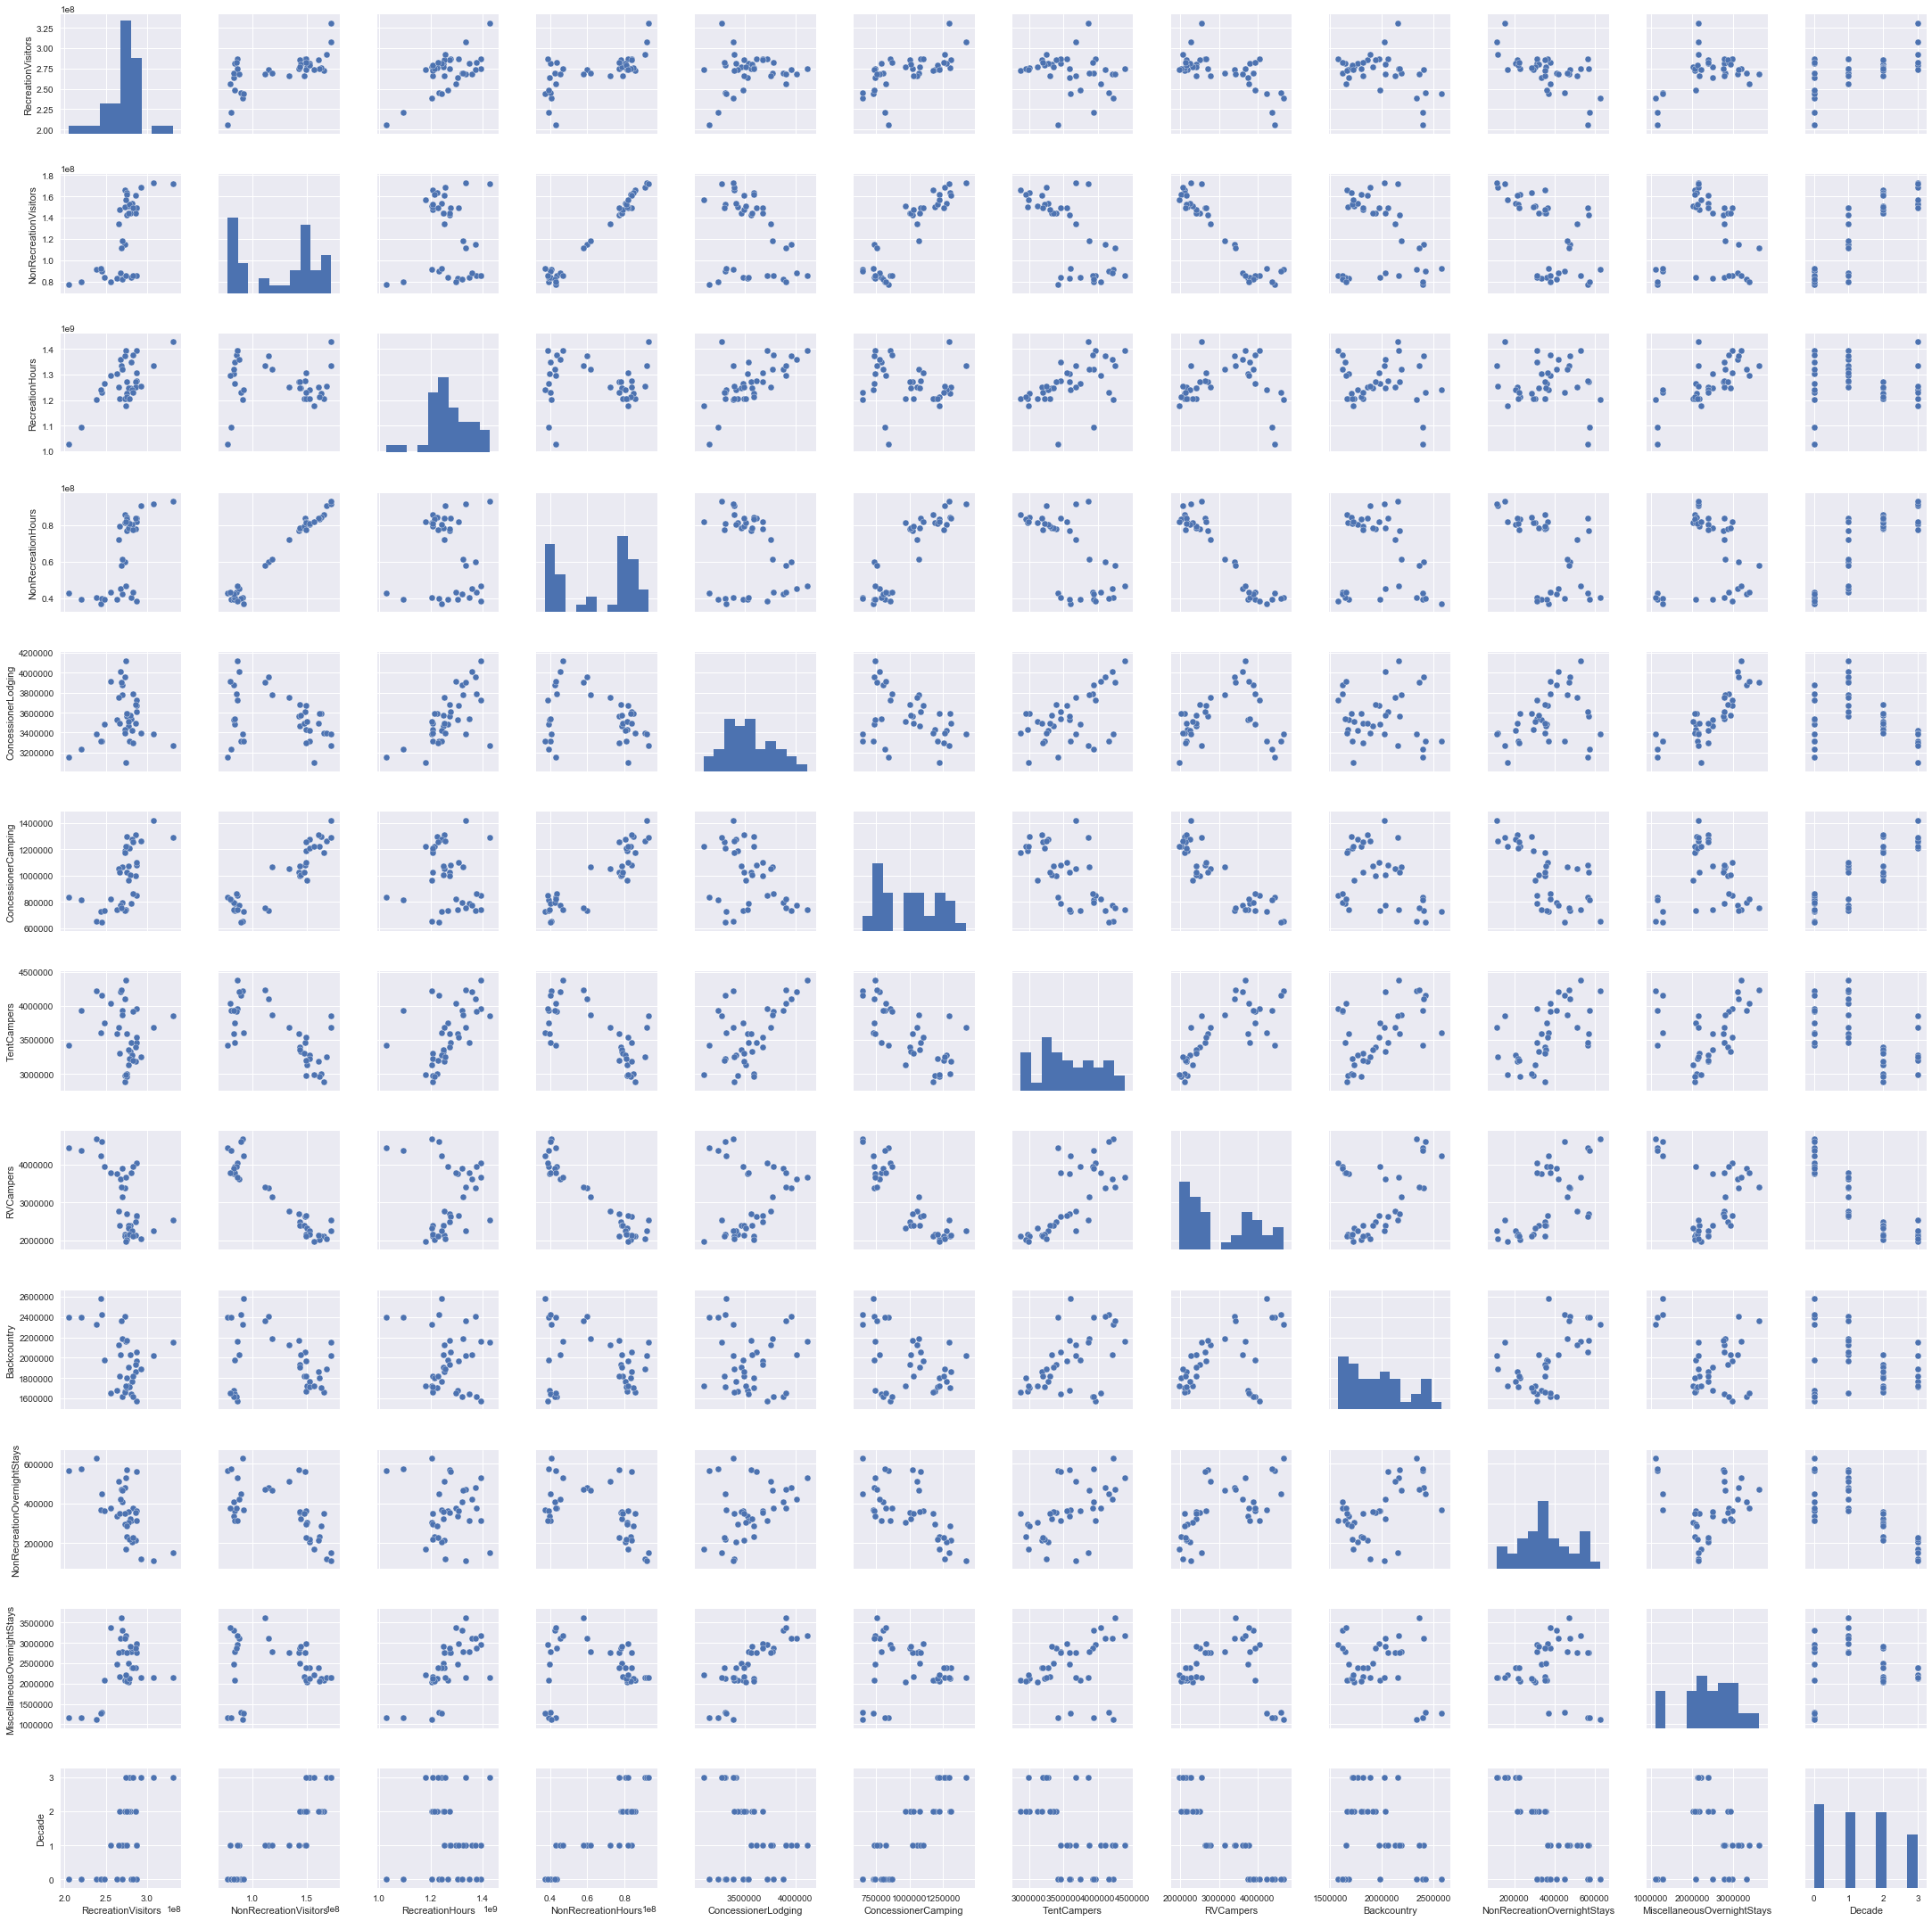

In [58]:
sns.pairplot(park_data_year_sums_79)
plt.show()

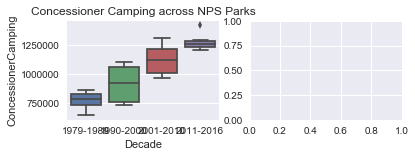

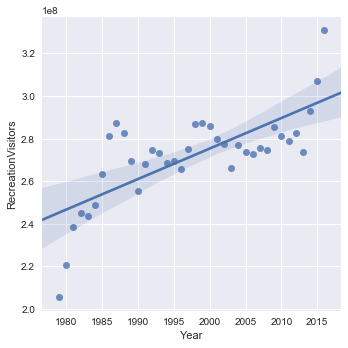

In [165]:
# why is that there??

plt.clf()
plt.subplot(2,2,1)
_ = sns.boxplot(x='Decade', y='ConcessionerCamping', data=park_data_year_sums_79)
_ = plt.xticks(np.arange(4),('1979-1989', '1990-2000', '2001-2010', '2011-2016'))
_ = plt.title('Concessioner Camping across NPS Parks')

plt.subplot(2,2,2)
_ = sns.lmplot(y='RecreationVisitors', x='Year', data=park_data_year_sums_79.reset_index())

plt.show()